# Import, options

In [1]:
import numpy, seaborn, pandas
import matplotlib, matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'svg.fonttype' : 'none'})
#'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20,'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',                            'figure.figsize':(8, 5), 

In [3]:
file_directory = "/Users/kja11/OneDrive - Menntaský/PostDoc_Hypothermia/in_silico/Python/"

# Data Download

In [39]:
#data DEseq HEK293
df_RNAseq = pandas.read_csv(file_directory+'1) input/RNAseq/from_output/DEGs_HEK293_temp_annotated.csv', 
                     sep=',')
print(df_RNAseq.shape, '\n', df_RNAseq.columns)
df_RNAseq.head()

(15323, 10) 
 Index(['gene_id', 'gene_name', 'Gene type', 'Gene description', 'baseMean',
       'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj'],
      dtype='object')


,gene_id,gene_name,Gene type,Gene description,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,ENSG00000000003,TSPAN6,protein_coding,tetraspanin 6 [Source:HGNC Symbol;Acc:HGNC:11858],1417.578539,0.236871,0.190655,1.242407,0.214086,0.729350
1,ENSG00000000419,DPM1,protein_coding,dolichyl-phosphate mannosyltransferase subunit...,4685.997108,0.422995,0.183466,2.305574,0.021134,0.357952
2,ENSG00000000457,SCYL3,protein_coding,SCY1 like pseudokinase 3 [Source:HGNC Symbol;A...,135.788628,0.025567,0.324710,0.078738,0.937241,0.987078
3,ENSG00000000460,FIRRM,protein_coding,FIGNL1 interacting regulator of recombination ...,669.515399,-0.044322,0.230353,-0.192407,0.847423,0.966125
4,ENSG00000000971,CFH,protein_coding,complement factor H [Source:HGNC Symbol;Acc:HG...,78.489575,0.838610,0.413537,2.027894,0.042571,0.447272


In [40]:
files = 'GeCKO_SP1_activators', 'GeCKO_SP1_repressors'

df_GeCKO = pandas.DataFrame()
df_list = []

for file in files:
    df_loop = pandas.read_csv(file_directory+f'1) input/GeCKO/{file}'+'.csv', sep=',')
    df_loop = df_loop.assign(gene_name = df_loop['Gene Symbol'],
                             effect = file.split('_')[2])
    df_loop = df_loop[['gene_name','effect','Score','FDR','GeCKO_number']]
    print(len(df_loop))
    
    df_list.append(df_loop)

df_GeCKO = pandas.concat(df_list, axis=0)
df_GeCKO

61
495


,gene_name,effect,Score,FDR,GeCKO_number
0,PDS5B,activators,4.6,0.18,4
1,SYT1,activators,4.5,0.18,5
2,DDX18,activators,4.5,0.18,7
3,POU4F3,activators,4.4,0.18,8
4,ZNF71,activators,4.4,0.18,9
...,...,...,...,...,...
490,CNTNAP2,repressors,2.6,0.25,523
491,hsa-mir-5693,repressors,0.3,0.25,525
492,hsa-mir-300,repressors,2.6,0.25,527
493,ZNF816-ZNF321P,repressors,2.6,0.23,531


In [42]:
len(df_RNAseq)

15323

In [41]:
df_RNAseq = df_RNAseq.rename(columns = {'log2FoldChange' : 'RNAseq_log2fc',
                                        'padj' : 'RNAseq_adj_pval'})

dfmerge = pandas.merge(df_GeCKO, df_RNAseq[['gene_name','RNAseq_log2fc', 'RNAseq_adj_pval']], 
                       on= 'gene_name', how='left')

dfmerge

,gene_name,effect,Score,FDR,GeCKO_number,RNAseq_log2fc,RNAseq_adj_pval
0,PDS5B,activators,4.6,0.18,4,-0.393579,0.713558
1,SYT1,activators,4.5,0.18,5,0.257288,0.863474
2,DDX18,activators,4.5,0.18,7,0.029512,0.983849
3,POU4F3,activators,4.4,0.18,8,NaN,NaN
4,ZNF71,activators,4.4,0.18,9,0.537995,0.668698
...,...,...,...,...,...,...,...
552,CNTNAP2,repressors,2.6,0.25,523,-0.053100,0.971962
553,hsa-mir-5693,repressors,0.3,0.25,525,NaN,NaN
554,hsa-mir-300,repressors,2.6,0.25,527,NaN,NaN
555,ZNF816-ZNF321P,repressors,2.6,0.23,531,0.550573,0.709684


In [ ]:
RNAseq_log2fc = log2FoldChange
RNAseq_adj_pval = padj

## Data transformation

In [7]:
# Remove the non expressed transcripts (less than 10 counts)
full_leng = len(df)
df = df[df.max(axis=1) >= 10]

filtr_leng = len(df)
dropped_transcripts = full_leng - filtr_leng

print(f'On {full_leng}, {dropped_transcripts} transcripts do not exceed 10 counts')

df = df.T
df

On 22752, 7429 transcripts do not exceed 10 counts


gene_id,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,...,ENSG00000292343,ENSG00000292344,ENSG00000292345,ENSG00000292348,ENSG00000292357,ENSG00000292358,ENSG00000292361,ENSG00000292366,ENSG00000292372,ENSG00000292373
s37rep1_sum,1669,5097,158,875,103,255,223,190,469,547,...,124,560,292,9385,1,178,30,568,486,6
s37rep2_sum,1746,5407,173,850,74,269,312,167,318,586,...,124,549,315,9491,11,205,23,459,555,0
s37rep3_sum,1154,3552,136,650,27,277,166,136,475,468,...,119,683,193,7060,6,132,36,279,515,0
s32rep1_sum,1319,4640,113,481,100,238,193,91,268,333,...,55,297,273,8885,0,165,37,459,528,13
s32rep2_sum,1492,5216,97,635,91,245,315,71,297,436,...,118,395,244,8652,8,290,22,412,464,10
s32rep3_sum,1265,4412,145,618,78,157,140,54,297,398,...,59,368,141,5871,3,74,36,303,305,0


### Deseq2

In [8]:
# Preapre the deseq2 metadata
metadata = pandas.DataFrame(zip(df.index, ['37°','37°','37°','32°', '32°', '32°']),
                            columns = ['Sample', 'Condition'])

metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
s37rep1_sum,37°
s37rep2_sum,37°
s37rep3_sum,37°
s32rep1_sum,32°
s32rep2_sum,32°
s32rep3_sum,32°


In [9]:
%%time
# define the data
dds = DeseqDataSet(counts = df,
                   metadata = metadata,
                   design_factors = "Condition")
print(dds)

#run deseq2
dds.deseq2()

#show results, The name provided in the second element is the level that is used as baseline. 
stat_res = DeseqStats(dds, contrast = ('Condition', '32°', '37°'))

AnnData object with n_obs × n_vars = 6 × 15323
    obs: 'Condition'
    obsm: 'design_matrix'


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 5.34 seconds.

Fitting dispersion trend curve...
... done in 0.77 seconds.

Fitting MAP dispersions...
... done in 6.80 seconds.

Fitting LFCs...


CPU times: total: 7.94 s
Wall time: 27 s


... done in 2.98 seconds.

Refitting 0 outliers.



In [10]:
# save results in a df
stat_res.summary()

res = stat_res.results_df
res

Running Wald tests...
... done in 1.36 seconds.



Log2 fold change & Wald test p-value: Condition 32° vs 37°
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
gene_id                                                                      
ENSG00000000003  1417.578539        0.236871  0.190655  1.242407  0.214086   
ENSG00000000419  4685.997108        0.422995  0.183466  2.305574  0.021134   
ENSG00000000457   135.788628        0.025567  0.324710  0.078738  0.937241   
ENSG00000000460   669.515399       -0.044322  0.230353 -0.192407  0.847423   
ENSG00000000971    78.489575        0.838610  0.413537  2.027894  0.042571   
...                      ...             ...       ...       ...       ...   
ENSG00000292358   168.216188        0.370319  0.374895  0.987792  0.323255   
ENSG00000292361    31.402552        0.477819  0.528571  0.903982  0.366005   
ENSG00000292366   402.038279        0.248861  0.244840  1.016422  0.309428   
ENSG00000292372   466.011302        0.087336  0.236827  0.368775  0.712295   
ENSG0

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSG00000000003,1417.578539,0.236871,0.190655,1.242407,0.214086,0.729350
ENSG00000000419,4685.997108,0.422995,0.183466,2.305574,0.021134,0.357952
ENSG00000000457,135.788628,0.025567,0.324710,0.078738,0.937241,0.987078
ENSG00000000460,669.515399,-0.044322,0.230353,-0.192407,0.847423,0.966125
ENSG00000000971,78.489575,0.838610,0.413537,2.027894,0.042571,0.447272
...,...,...,...,...,...,...
ENSG00000292358,168.216188,0.370319,0.374895,0.987792,0.323255,0.806471
ENSG00000292361,31.402552,0.477819,0.528571,0.903982,0.366005,0.827400
ENSG00000292366,402.038279,0.248861,0.244840,1.016422,0.309428,0.797346


In [11]:
# create a df of the result + annotation
df_anno  = pandas.merge(annotation, res, left_index=True, right_index=True, how = 'right')
print(df_anno .shape)
df_anno.head(3)

(15323, 9)


,gene_name,Gene type,Gene description,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,,,,
ENSG00000000003,TSPAN6,protein_coding,tetraspanin 6 [Source:HGNC Symbol;Acc:HGNC:11858],1417.578539,0.236871,0.190655,1.242407,0.214086,0.729350
ENSG00000000419,DPM1,protein_coding,dolichyl-phosphate mannosyltransferase subunit...,4685.997108,0.422995,0.183466,2.305574,0.021134,0.357952
ENSG00000000457,SCYL3,protein_coding,SCY1 like pseudokinase 3 [Source:HGNC Symbol;A...,135.788628,0.025567,0.324710,0.078738,0.937241,0.987078


## Plot visualization

### all

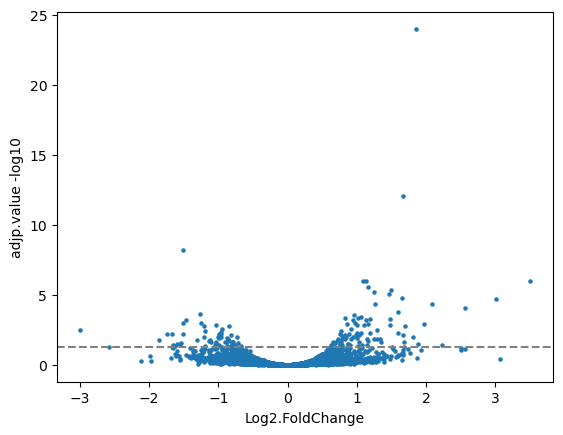

In [12]:
#volcano plot
# Plot, after convertion  y to log10(pvalue)
plt.scatter(x=df_anno['log2FoldChange'], y=df_anno['padj'].apply(lambda x:-numpy.log10(x)),s=5)

plt.xlabel("Log2.FoldChange")
plt.ylabel("adjp.value -log10")

# pvalue <0.05
plt.axhline(-numpy.log10(0.05),color="grey",linestyle="--")

### Significant ones

In [13]:
# keep padj < 0.05
df_signif = df_anno[df_anno['padj'] < 0.05]
df_signif.shape

(143, 9)

In [14]:
df_signif[['log2FoldChange','padj','gene_name']].head()

,log2FoldChange,padj,gene_name
gene_id,,,
ENSG00000005486,0.787436,0.037883,RHBDD2
ENSG00000010818,-1.466592,0.000663,HIVEP2
ENSG00000040487,1.020488,0.048337,SLC66A1
ENSG00000055609,-0.678227,0.046618,KMT2C
ENSG00000071243,0.895190,0.040309,ING3


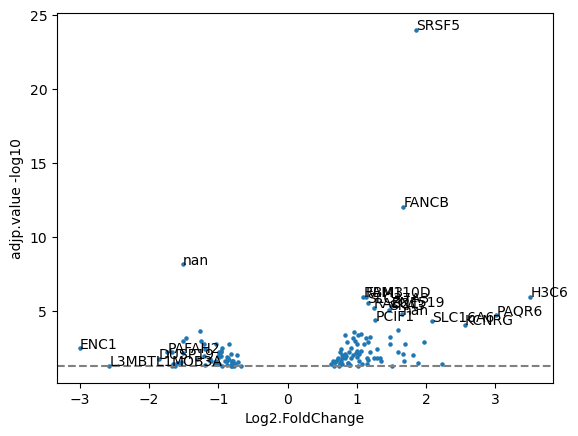

In [15]:
#volcano plot
# Plot, after convertion  y to log10(pvalue)
top_15 = df_signif.sort_values(by='padj', ascending=True).head(15)
topneg_5 = df_signif.sort_values(by='log2FoldChange', ascending=True).head(5)

plt.scatter(x=df_signif['log2FoldChange'], 
            y=df_signif['padj'].apply(lambda x:-numpy.log10(x)),s=5)

# Annotate points on the plot with Symbol names
for index, row in top_15.iterrows():
    plt.annotate(row['gene_name'], (row['log2FoldChange'], -numpy.log10(row['padj'])),
                fontsize = 10)
    
for index, row in topneg_5.iterrows():
    plt.annotate(row['gene_name'], (row['log2FoldChange'], -numpy.log10(row['padj'])),
                fontsize = 10)

plt.xlabel("Log2.FoldChange")
plt.ylabel("adjp.value -log10")

# pvalue <0.05
plt.axhline(-numpy.log10(0.05),color="grey",linestyle="--")

In [16]:
# save to .txt the genes
## positive
# numpy.savetxt(file_directory+"3) output/top15_genes_HEK293.txt", 
#               top_15['Symbol'].unique(), delimiter="\t", fmt="% s")

# ## negative
# numpy.savetxt(file_directory+"3) output/top5_negative_genes_HEK293.txt", 
#               topneg_5['Symbol'].unique(), delimiter="\t", fmt="% s")

print(top_15[['log2FoldChange','padj','gene_name']].head(), '\n','\n',  topneg_5[['log2FoldChange','padj','gene_name']])

                 log2FoldChange          padj gene_name
gene_id                                                
ENSG00000100650        1.853514  1.016302e-24     SRSF5
ENSG00000181544        1.669421  8.859944e-13     FANCB
ENSG00000276256       -1.510055  6.523034e-09       NaN
ENSG00000274750        3.508002  1.064566e-06      H3C6
ENSG00000197245        1.130433  1.064566e-06   FAM110D 
 
                  log2FoldChange      padj gene_name
gene_id                                            
ENSG00000171617       -3.005349  0.003257      ENC1
ENSG00000185513       -2.576141  0.048935   L3MBTL1
ENSG00000162999       -1.863518  0.015869    DUSP19
ENSG00000158006       -1.738252  0.005736    PAFAH2
ENSG00000172081       -1.675641  0.048815     MOB3A


## GSEA

In [17]:
# Tag % = % of gene hits before (for positive ES) or after (for negative ES) the peak
#         in the running enrichment score. This gives an indication of the percentage 
#         of genes contributing to the enrichment score.

# lead_genes: leading edge genes (gene hits before running enrichment peak)

### Preparation

In [18]:
# Rank and so GSEA plot will be based on Stat. More stat is high more it's diff expressed.
ranking = df_anno[['gene_name', 'stat']].dropna().sort_values('stat', ascending = False)
print(ranking.shape)

ranking = ranking.drop_duplicates('gene_name')
print(ranking.shape)
ranking

(14785, 2)
(14762, 2)


,gene_name,stat
gene_id,,
ENSG00000100650,SRSF5,11.137596
ENSG00000181544,FANCB,8.261780
ENSG00000197245,FAM110D,6.241401
ENSG00000102317,RBM3,6.220320
ENSG00000274750,H3C6,6.213757
...,...,...
ENSG00000156469,MTERF3,-4.593503
ENSG00000110172,CHORDC1,-4.735344
ENSG00000120370,GORAB,-4.740968


In [19]:
# default: Human
names = gseapy.get_library_name(organism='Human')
# names[:10]

### Cellular Component

2024-04-03 12:27:34,343 [WARNING] Duplicated values found in preranked stats: 0.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


positive: 
                                                 Term    Tag %  Gene %
0  GO_Cellular_Component_2023__Organelle Inner Me...  180/366  24.66%
1  GO_Cellular_Component_2023__Mitochondrial Inne...  158/346  21.05%
2  GO_Cellular_Component_2023__Respiratory Chain ...    33/41  25.45%


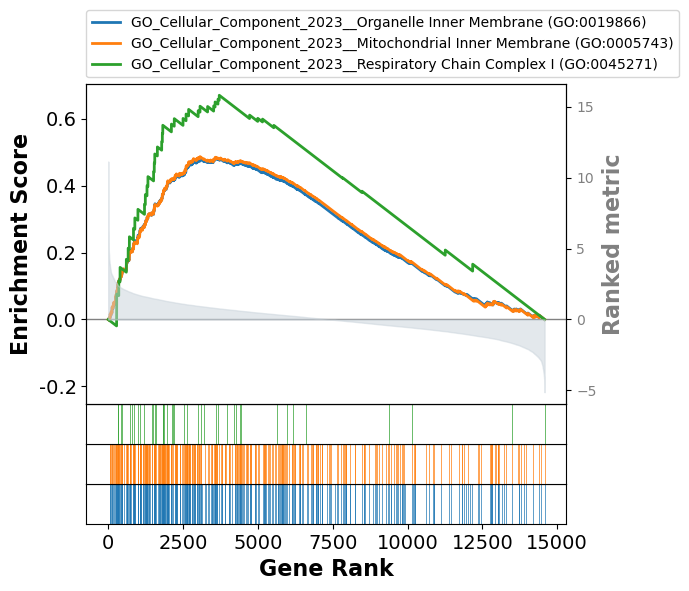

negative: 
 Term      GO_Cellular_Component_2023__Synaptic Vesicle M...
Tag %                                                  7/34
Gene %                                               21.41%
Name: 232, dtype: object


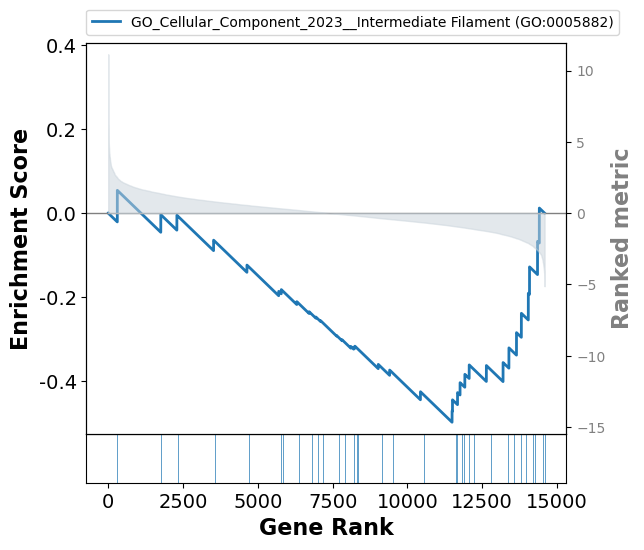

In [87]:
# GO_cellular component_2023
pre_res = gseapy.prerank(rnk = ranking.set_index("gene_name", drop=True),
                     gene_sets = ['GO_Cellular_Component_2023'],
                     seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

# positive
print('positive: \n', pre_res.res2d.iloc[:3,[1,7,8]])
pre_res.plot(terms=terms[:3])
plt.show()
plt.close()


# negative
print('negative: \n', pre_res.res2d.iloc[-1,[1,7,8]])
pre_res.plot(terms=terms[-1:])
plt.show()
plt.close()

### Cellular Component: Stress Granules

In [21]:
str_gr = terms[terms.str.contains('Stress Granule')].index
terms[terms.str.contains('Stress Granule')]

93    GO_Cellular_Component_2023__Cytoplasmic Stress...
Name: Term, dtype: object

2024-04-02 14:41:14,745 [WARNING] Duplicated values found in preranked stats: 0.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


negative: 
 Term      GO_Cellular_Component_2023__Cytoplasmic Stress...
Tag %                                                 21/69
Gene %                                               16.31%
Name: 93, dtype: object


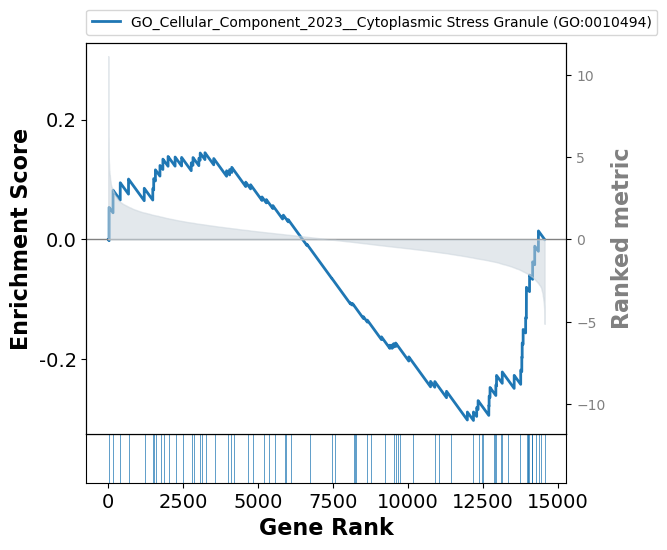

In [22]:
# GO_cellular component_2023
pre_res = gseapy.prerank(rnk = ranking.set_index("gene_name", drop=True),
                     gene_sets = ['GO_Cellular_Component_2023'],
                     seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

#only stress granules
print('negative: \n', pre_res.res2d.iloc[93,[1,7,8]])
pre_res.plot(terms = terms[str_gr])
plt.show()
plt.close()


In [23]:
lead_genes_GO_SG = pre_res.res2d.loc[pre_res.res2d.index[str_gr]].Lead_genes
lead_genes_GO_SG = lead_genes_GO_SG.str.split(';')
lead_genes_GO_SG.explode()

93     LIN28A
93      DYRK3
93      HIPK2
93     GIGYF2
93    IGF2BP2
93       PUM2
93       PUM1
93    IGF2BP3
93       TIA1
93     PRKAA2
93      ZNFX1
93      LARP1
93      G3BP1
93     LARP4B
93    IGF2BP1
93     ATXN2L
93       FMR1
93     YTHDF3
93      ZFP36
93      ROCK1
93     MCRIP2
Name: Lead_genes, dtype: object

In [24]:
# save to .txt the genes
numpy.savetxt(file_directory+"3) output/neg_stress_granules_genes_HEK293.txt", 
              lead_genes_GO_SG.explode(), delimiter="\t", fmt="% s")

In [25]:
# gene set from https://en.wikipedia.org/wiki/Stress_granule
stress_ganule_wikip = pandas.read_csv(file_directory+'1) input/stressganule_genes_wikip.csv', sep = ',')
print(len(stress_ganule_wikip))

723


2024-04-02 14:41:17,762 [WARNING] Duplicated values found in preranked stats: 0.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


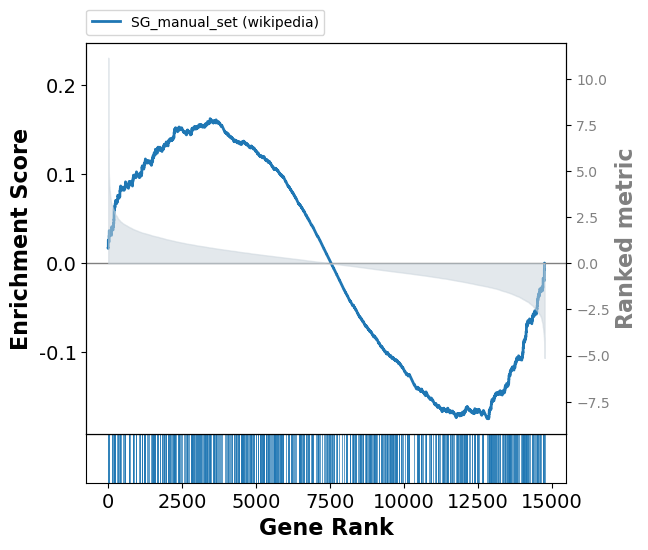

In [26]:
manual_set = {'SG_manual_set (wikipedia)': list(stress_ganule_wikip['Gene ID'])}
pre_res = gseapy.prerank(rnk = ranking.set_index("gene_name", drop=True),
                         gene_sets = manual_set,
                         seed = 6, permutation_num = 100,
                         min_size=5,
                         max_size=1000)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

# positive
pre_res.plot(terms=terms)
plt.show()
plt.close()


### Cellular Componant: P bodies

2024-04-02 14:44:12,124 [WARNING] Duplicated values found in preranked stats: 0.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


negative: 
 Term      GO_Cellular_Component_2023__Vesicle (GO:0031982)
Tag %                                               29/195
Gene %                                              13.37%
Name: 189, dtype: object


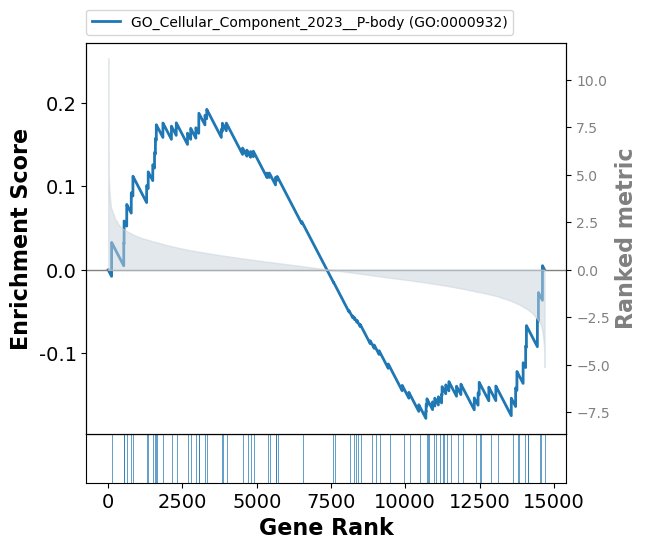

In [32]:
# GO_cellular component_2023
pre_res = gseapy.prerank(rnk = ranking.set_index("gene_name", drop=True),
                     gene_sets = ['GO_Cellular_Component_2023'],
                     seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

P_bodies = terms[terms.str.contains('P-body')].index
terms[terms.str.contains('P-body')]

#only stress granules
print('negative: \n', pre_res.res2d.iloc[189,[1,7,8]])
pre_res.plot(terms = terms[P_bodies])
plt.show()
plt.close()


### Molecular Function

2024-04-02 14:41:20,834 [WARNING] Duplicated values found in preranked stats: 0.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


positive: 
                                                 Term  Tag %  Gene %
0  GO_Molecular_Function_2023__Oxidoreduction-Dri...  40/52  25.45%
1  GO_Molecular_Function_2023__NADH Dehydrogenase...  27/33  25.45%
2  GO_Molecular_Function_2023__NADH Dehydrogenase...  27/34  25.45%


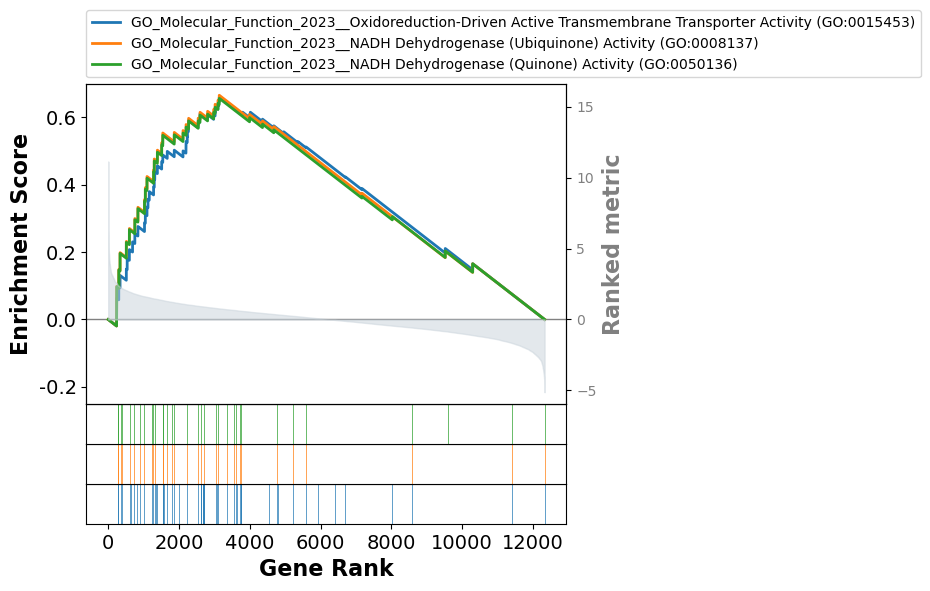

nothing interesting in negative


In [29]:
# GO_Molecular_Function_2023
pre_res = gseapy.prerank(rnk = ranking.set_index("gene_name", drop=True),
                     gene_sets = ['GO_Molecular_Function_2023'],
                     seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

# positive
print('positive: \n', pre_res.res2d.iloc[:3,[1,7,8]])

pre_res.plot(terms=terms[:3])
plt.show()
plt.close()

# negative
print('nothing interesting in negative')

### Biological Process

2024-04-02 14:46:57,338 [WARNING] Duplicated values found in preranked stats: 0.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


positive: 
                                                 Term  Tag %  Gene %
0  GO_Biological_Process_2023__Cellular Respirati...  57/83  25.46%
1  GO_Biological_Process_2023__Aerobic Electron T...  49/66  25.45%
2  GO_Biological_Process_2023__Proton Motive Forc...  47/58  26.15%


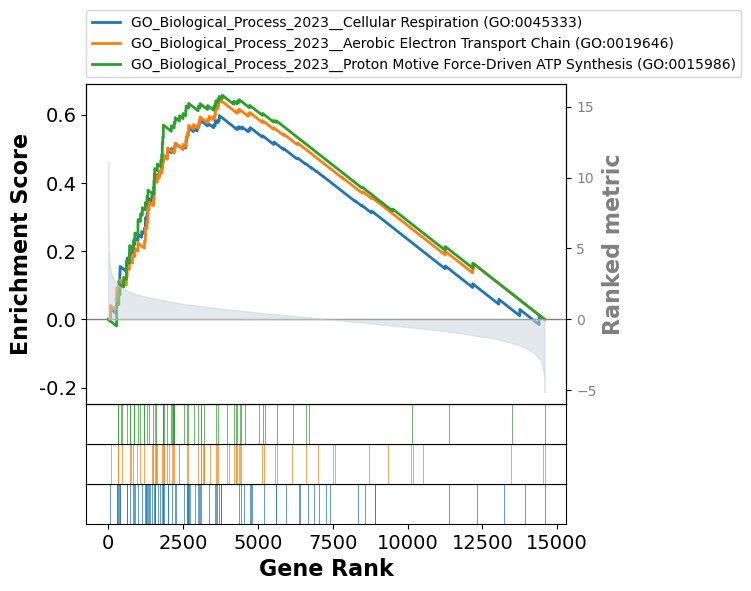

positive: 
                                                    Term Tag %  Gene %
2217  GO_Biological_Process_2023__Dendrite Morphogen...  5/25  22.46%


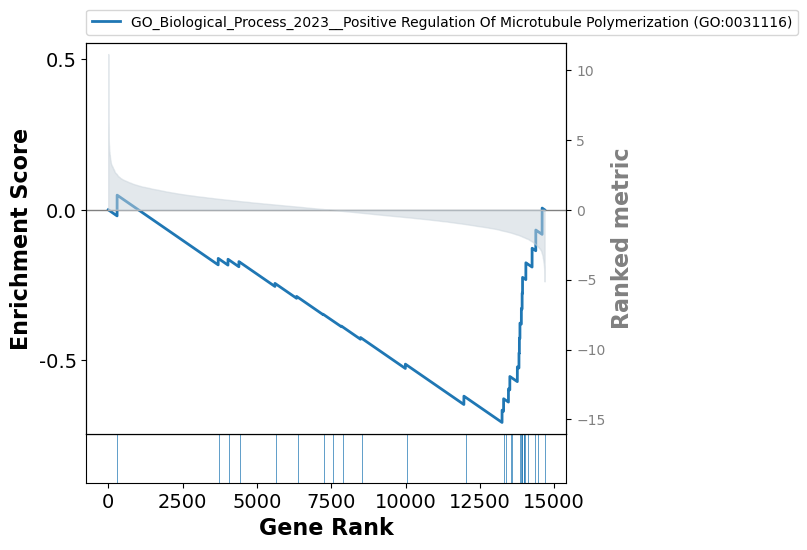

In [33]:
# GO_Biological_Process_2023
pre_res = gseapy.prerank(rnk = ranking.set_index("gene_name", drop=True),
                     gene_sets = ['GO_Biological_Process_2023'],
                     seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

# positive
print('positive: \n', pre_res.res2d.iloc[:3,[1,7,8]])
pre_res.plot(terms=terms[:3])
plt.show()
plt.close()

# negative
print('positive: \n', pre_res.res2d.iloc[-1:,[1,7,8]])
pre_res.plot(terms=terms[-1:])
plt.show()
plt.close()

In [51]:
calcium = terms[terms.str.contains('Calcium')].index
len(terms[terms.str.contains('Calcium')])

31

#### Calcium signaling

In [93]:
terms

0     GO_Biological_Process_2023__Cellular Respirati...
1     GO_Biological_Process_2023__Aerobic Electron T...
2     GO_Biological_Process_2023__Proton Motive Forc...
3     GO_Biological_Process_2023__Mitochondrial ATP ...
4     GO_Biological_Process_2023__Oxidative Phosphor...
                            ...                        
28    GO_Biological_Process_2023__Regulation Of Micr...
26    GO_Biological_Process_2023__Protein Localizati...
20    GO_Biological_Process_2023__Hemopoiesis (GO:00...
18    GO_Biological_Process_2023__Golgi To Endosome ...
6     GO_Biological_Process_2023__Positive Regulatio...
Name: Term, Length: 2218, dtype: object

2024-04-03 12:48:03,289 [WARNING] Duplicated values found in preranked stats: 0.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


positive: 
                                                    Term  Tag %  Gene %
894   GO_Biological_Process_2023__Negative Regulatio...   7/15  25.94%
917   GO_Biological_Process_2023__Response To Calciu...  21/83  18.34%
1051  GO_Biological_Process_2023__Regulation Of Calc...  11/19  35.69%
1054  GO_Biological_Process_2023__Cellular Response ...  21/54  27.98%
1175  GO_Biological_Process_2023__Regulation Of Calc...   6/15  29.20%


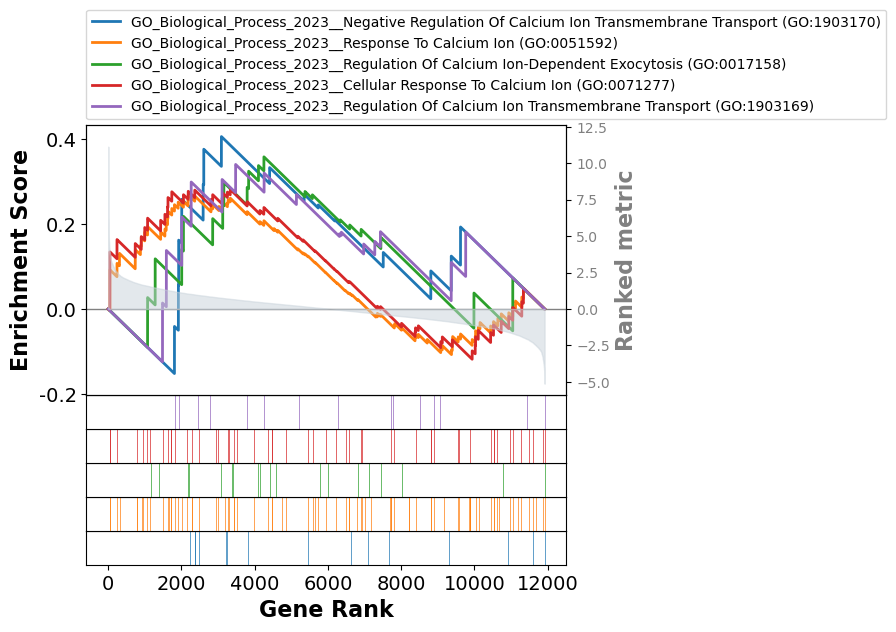

negative: 
                                                   Term  Tag %  Gene %
862  GO_Biological_Process_2023__Regulation Of Rele...   2/18   0.72%
840  GO_Biological_Process_2023__Regulation Of Card...   2/18   0.72%
735  GO_Biological_Process_2023__Calcium Ion Import...  12/24  27.34%
550  GO_Biological_Process_2023__Calcium Ion Transp...  19/76  18.37%
461  GO_Biological_Process_2023__Calcium Ion Transm...  17/59  19.83%


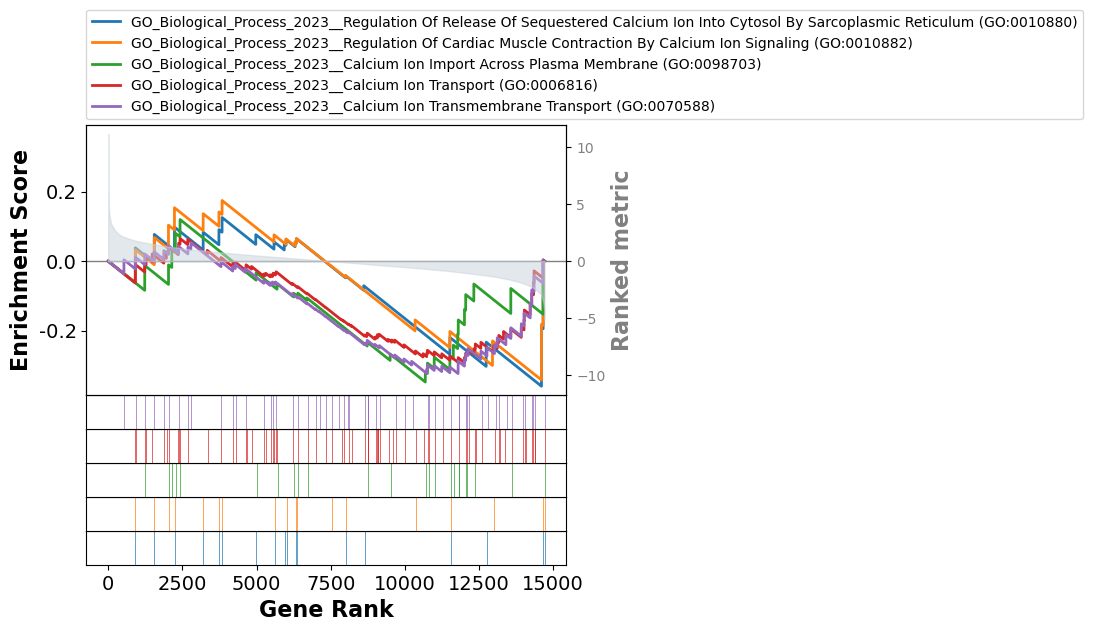

In [104]:
# GO_Biological_Process_2023
pre_res = gseapy.prerank(rnk = ranking.set_index("gene_name", drop=True),
                     gene_sets = ['GO_Biological_Process_2023'],
                     seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

calcium = terms[terms.str.contains('Calcium')].index

# positive
print('positive: \n', pre_res.res2d.iloc[terms[calcium].index[:5],[1,7,8]])
pre_res.plot(terms = terms[calcium][:5])
plt.show()
plt.close()

# negative
print('negative: \n', pre_res.res2d.iloc[terms[calcium].index[-5:],[1,7,8]])
pre_res.plot(terms = terms[calcium][-5:])
plt.show()
plt.close()

### KEGG

2024-04-02 14:41:41,206 [WARNING] Duplicated values found in preranked stats: 0.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


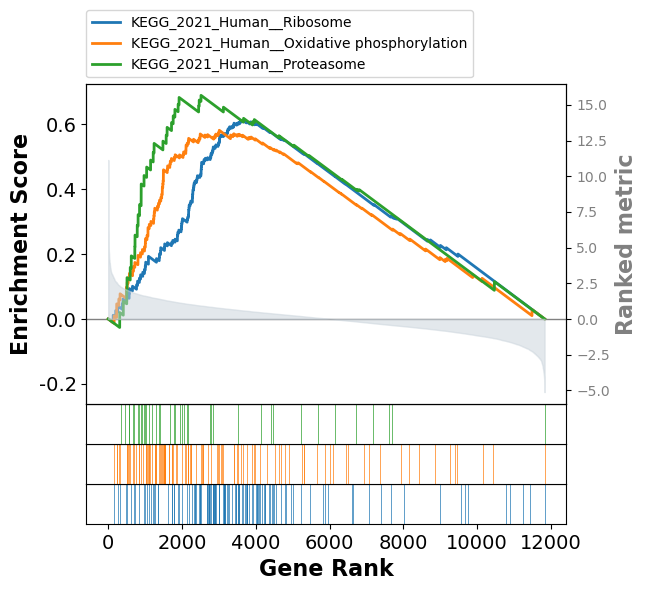

nothing interesting


In [31]:
# KEGG_2021_Human
pre_res = gseapy.prerank(rnk = ranking.set_index("gene_name", drop=True),
                     gene_sets = ['KEGG_2021_Human'],
                     seed = 6, permutation_num = 100)

enrich_results = pre_res.res2d.sort_values("NES", ascending = False)
terms = enrich_results.Term

# positive
pre_res.plot(terms=terms[:3])
plt.show()
plt.close()

# negative
print('nothing interesting')